In [4]:
import pandas as pd, matplotlib.pyplot as plt, os
labels = pd.read_csv("../data/train_labels.csv")
labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


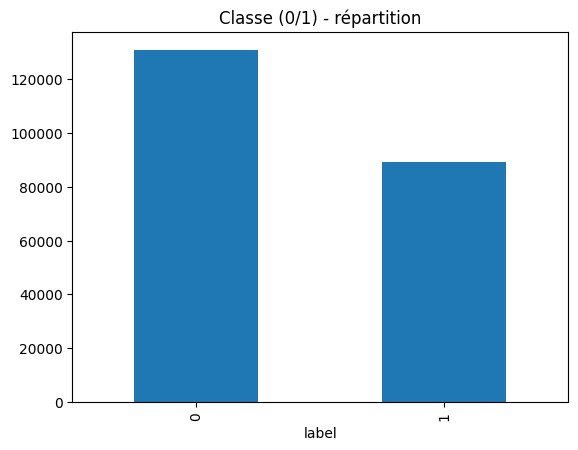

label
0    0.594969
1    0.405031
Name: proportion, dtype: float64


In [5]:
labels['label'].value_counts().plot(kind='bar')
plt.title("Classe (0/1) - répartition"); plt.show()
print(labels['label'].value_counts(normalize=True))

,Classe,Effectif,Proportion,Pourcentage (%)
0,Négatif (label=0),130908,0.5950,59.50
1,Positif (label=1),89117,0.4050,40.50
2,Total,220025,1.0000,100.00


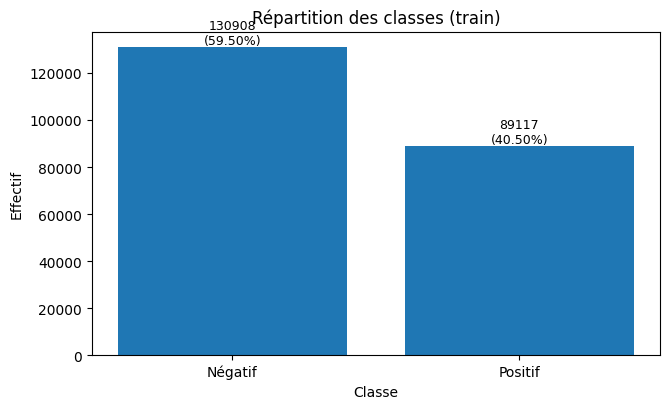

CSV : reports\tables\class_distribution.csv
PNG : reports\figures\class_distribution.png
PDF : reports\figures\class_distribution.pdf


In [6]:
# === Répartition des classes (beau tableau + graphique annoté) ===
# - Utilise `labels` si déjà chargé (DataFrame avec colonne 'label')
# - Sinon charge data/train_labels.csv (ou FORCE_DATA_DIR si précisé)
# - Produit un tableau propre + une figure (barres) avec annotations
# - Sauvegarde CSV + PNG + PDF dans reports/

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# 0) Si tu veux forcer le chemin absolu du dossier data, décommente et adapte :
# FORCE_DATA_DIR = Path(r"C:\Users\USER\Desktop\memoire\cancer-detection-mlops\data")
FORCE_DATA_DIR = None

# 1) Récupérer le DataFrame 'labels' s'il existe déjà
labels_df = None
if "labels" in globals() and isinstance(labels, pd.DataFrame) and "label" in labels.columns:
    labels_df = labels

# 2) Sinon, localiser et lire data/train_labels.csv
if labels_df is None:
    CANDIDATE_DATA_DIRS = [
        Path("data"),
        Path("./data"),
        Path("../data"),
        Path("../../data"),
        Path.cwd() / "data",
        Path.cwd().parent / "data",
    ]
    if FORCE_DATA_DIR is not None:
        CANDIDATE_DATA_DIRS.insert(0, FORCE_DATA_DIR)

    LABELS_CSV = None
    for base in CANDIDATE_DATA_DIRS:
        if (base / "train_labels.csv").exists():
            LABELS_CSV = base / "train_labels.csv"
            break

    if LABELS_CSV is None:
        raise FileNotFoundError(
            "Impossible de trouver data/train_labels.csv et aucune variable `labels` n'est définie.\n"
            "→ Soit tu définis `labels = pd.read_csv('data/train_labels.csv')`,\n"
            "  soit tu décommentes FORCE_DATA_DIR ci-dessus avec le chemin absolu vers ton dossier data."
        )
    labels_df = pd.read_csv(LABELS_CSV)

# 3) Calcul effectifs/proportions
if "label" not in labels_df.columns:
    raise KeyError("Le DataFrame ne contient pas la colonne 'label'.")

counts = labels_df["label"].value_counts().sort_index()
total = int(counts.sum())
proportions = (counts / total).round(4)

# 4) Construire un tableau propre avec Total
rows = []
labels_map = {0: "Négatif (label=0)", 1: "Positif (label=1)"}
for lbl in sorted(counts.index):
    rows.append({
        "Classe": labels_map.get(lbl, f"Label={lbl}"),
        "Effectif": int(counts[lbl]),
        "Proportion": float(proportions[lbl]),
        "Pourcentage (%)": round(100.0 * proportions[lbl], 2),
    })
rows.append({"Classe": "Total", "Effectif": total, "Proportion": 1.0, "Pourcentage (%)": 100.0})

table_df = pd.DataFrame(rows, columns=["Classe", "Effectif", "Proportion", "Pourcentage (%)"])

# 5) Affichage (joli) + sauvegardes
from IPython.display import display
display(table_df.style.format({"Proportion": "{:.4f}", "Pourcentage (%)": "{:.2f}"}))

# Sauvegardes
tables_dir = Path("reports/tables"); tables_dir.mkdir(parents=True, exist_ok=True)
figures_dir = Path("reports/figures"); figures_dir.mkdir(parents=True, exist_ok=True)

out_csv = tables_dir / "class_distribution.csv"
table_df.to_csv(out_csv, index=False, encoding="utf-8")

# 6) Graphique (matplotlib, un seul plot, sans couleurs imposées)
fig, ax = plt.subplots(figsize=(6.8, 4.2))
x = ["Négatif", "Positif"]
y = [counts.get(0, 0), counts.get(1, 0)]
bars = ax.bar(x, y)
ax.set_title("Répartition des classes (train)")
ax.set_xlabel("Classe")
ax.set_ylabel("Effectif")

# Annotations (nombre + pourcentage au-dessus des barres)
for rect, eff in zip(bars, y):
    pct = (eff / total * 100.0) if total > 0 else 0.0
    ax.text(rect.get_x() + rect.get_width()/2., rect.get_height(),
            f"{eff}\n({pct:.2f}%)",
            ha='center', va='bottom', fontsize=9)

fig.tight_layout()
out_png = figures_dir / "class_distribution.png"
out_pdf = figures_dir / "class_distribution.pdf"
fig.savefig(out_png, dpi=200)
fig.savefig(out_pdf)
plt.show()

print("CSV :", out_csv)
print("PNG :", out_png)
print("PDF :", out_pdf)


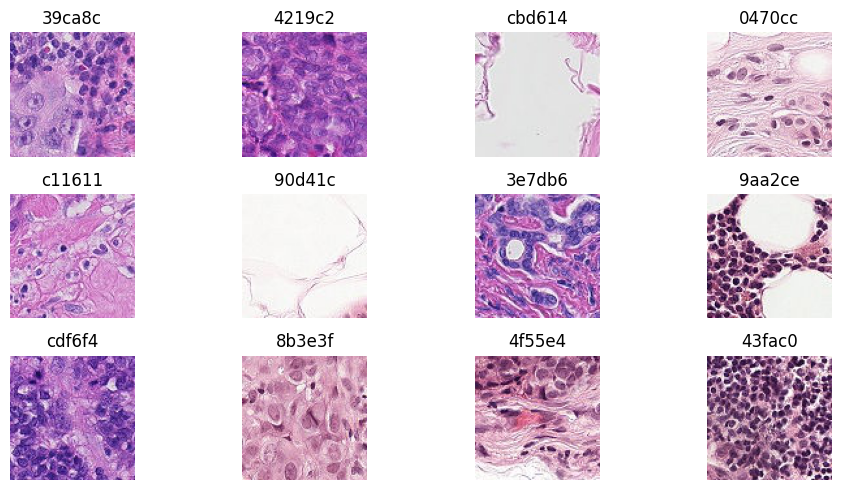

In [12]:
from PIL import Image
import random
ids = labels.sample(12, random_state=0)['id'].tolist()
fig, axs = plt.subplots(3,4, figsize=(10,5))
for ax, _id in zip(axs.ravel(), ids):
    for ext in [".png",".jpg",".jpeg",".tif"]:
        p = f"../data/train/{_id}{ext}"
        if os.path.exists(p):
            ax.imshow(Image.open(p)); ax.set_title(_id[:6]); ax.axis('off'); break
plt.tight_layout(); plt.show()

Répertoire courant: c:\Users\USER\Desktop\memoire\cancer-detection-mlops\notebooks
Chemin détecté pour train_labels.csv : ..\data\train_labels.csv
Dossier images train : ..\data\train


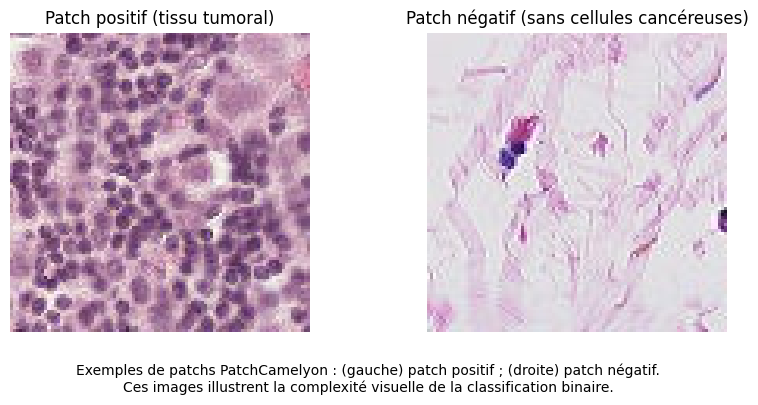


Figure sauvegardée → reports\figures\pcam_patch_examples.png
Positif: 387cc19be18c77f421e85acfec92aad6dfe878a9 (387cc19be18c77f421e85acfec92aad6dfe878a9.tif) | Négatif: 7cc059a5126e50590129354d22d77fbf94ff821f (7cc059a5126e50590129354d22d77fbf94ff821f.tif)


In [2]:
# Cellule robuste : affiche 2 patchs PCam (positif vs négatif) et sauvegarde la figure
import os, csv, random, sys
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

print("Répertoire courant:", os.getcwd())

# --------- Localisation robuste des chemins ---------
# Candidats pour data/ (adapter/ajouter si besoin)
CANDIDATE_DATA_DIRS = [
    Path("data"),
    Path("./data"),
    Path("../data"),
    Path("../../data"),
    Path.cwd() / "data",
    Path.cwd().parent / "data",
]

# Si tu connais le chemin exact, tu peux aussi le forcer ici :
# CANDIDATE_DATA_DIRS.insert(0, Path("C:/Users/USER/Desktop/memoire/cancer-detection-mlops/data"))

LABELS_CSV = None
TRAIN_DIR = None

for base in CANDIDATE_DATA_DIRS:
    if (base / "train_labels.csv").exists() and (base / "train").exists():
        LABELS_CSV = base / "train_labels.csv"
        TRAIN_DIR = base / "train"
        break

# Si toujours pas trouvé, tentative globale (coûteux mais pratique)
if LABELS_CSV is None:
    for p in Path.cwd().rglob("train_labels.csv"):
        # on suppose que le dossier "train" est frère du csv
        if (p.parent / "train").exists():
            LABELS_CSV = p
            TRAIN_DIR  = p.parent / "train"
            break

if LABELS_CSV is None or TRAIN_DIR is None:
    raise FileNotFoundError(
        "Impossible de localiser data/train_labels.csv et/ou data/train.\n"
        "→ Vérifie que tu exécutes le notebook à la racine du projet, ou ajuste les chemins.\n"
        "Arborescence attendue : <repo>/data/train_labels.csv et <repo>/data/train/"
    )

print(f"Chemin détecté pour train_labels.csv : {LABELS_CSV}")
print(f"Dossier images train : {TRAIN_DIR}")

# --------- Chargement des IDs positifs/négatifs ---------
pos_ids, neg_ids = [], []
with open(LABELS_CSV, newline="", encoding="utf-8") as f:
    r = csv.DictReader(f)
    # colonnes attendues: id,label  (0/1)
    for row in r:
        _id = row.get("id") or row.get("image_id") or row.get("filename")  # tolérance
        if _id is None:
            raise KeyError("Le CSV doit contenir une colonne 'id' (ou 'image_id' / 'filename').")
        lbl = int(row["label"])
        (pos_ids if lbl == 1 else neg_ids).append(_id)

if not pos_ids or not neg_ids:
    raise RuntimeError("Le CSV ne contient pas de positifs ET de négatifs. Vérifie train_labels.csv.")

# --------- Fonction pour retrouver le fichier image à partir d'un id ---------
EXTS = (".png",".jpg",".jpeg",".tif",".tiff")

def find_image(img_id, root: Path):
    # 1) Essayer id + extensions
    for ext in EXTS:
        p = root / f"{img_id}{ext}"
        if p.exists():
            return p
    # 2) Balayer tous les fichiers si les ids n'ont pas d'extension simple
    for p in root.rglob("*"):
        if p.is_file() and p.suffix.lower() in EXTS and (img_id == p.stem or img_id in p.stem):
            return p
    raise FileNotFoundError(f"Image introuvable pour id='{img_id}' dans {root}")

# --------- Choisir un exemple positif et négatif ---------
random.seed(42)  # pour figer l'exemple si tu relances
pos_id = random.choice(pos_ids)
neg_id = random.choice(neg_ids)

pos_path = find_image(pos_id, TRAIN_DIR)
neg_path = find_image(neg_id, TRAIN_DIR)

# --------- Charger et afficher ---------
img_pos = Image.open(pos_path).convert("RGB")
img_neg = Image.open(neg_path).convert("RGB")

plt.figure(figsize=(8.5, 4.2))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.imshow(img_pos)
ax1.set_title("Patch positif (tissu tumoral)")
ax1.axis("off")

ax2.imshow(img_neg)
ax2.set_title("Patch négatif (sans cellules cancéreuses)")
ax2.axis("off")

plt.suptitle(
    "Exemples de patchs PatchCamelyon : (gauche) patch positif ; (droite) patch négatif.\n"
    "Ces images illustrent la complexité visuelle de la classification binaire.",
    y=0.04, fontsize=10
)
plt.tight_layout(rect=[0, 0.08, 1, 1])

# --------- Sauvegarde figure ---------
OUT_DIR = Path("reports/figures")
OUT_DIR.mkdir(parents=True, exist_ok=True)
OUT_PNG = OUT_DIR / "pcam_patch_examples.png"
plt.savefig(OUT_PNG, dpi=200)
plt.show()

print(f"\nFigure sauvegardée → {OUT_PNG}")
print(f"Positif: {pos_id} ({pos_path.name}) | Négatif: {neg_id} ({neg_path.name})")


Répertoire courant: c:\Users\USER\Desktop\memoire\cancer-detection-mlops\notebooks
Chemin détecté pour train_labels.csv : ..\data\train_labels.csv
Dossier images train : ..\data\train


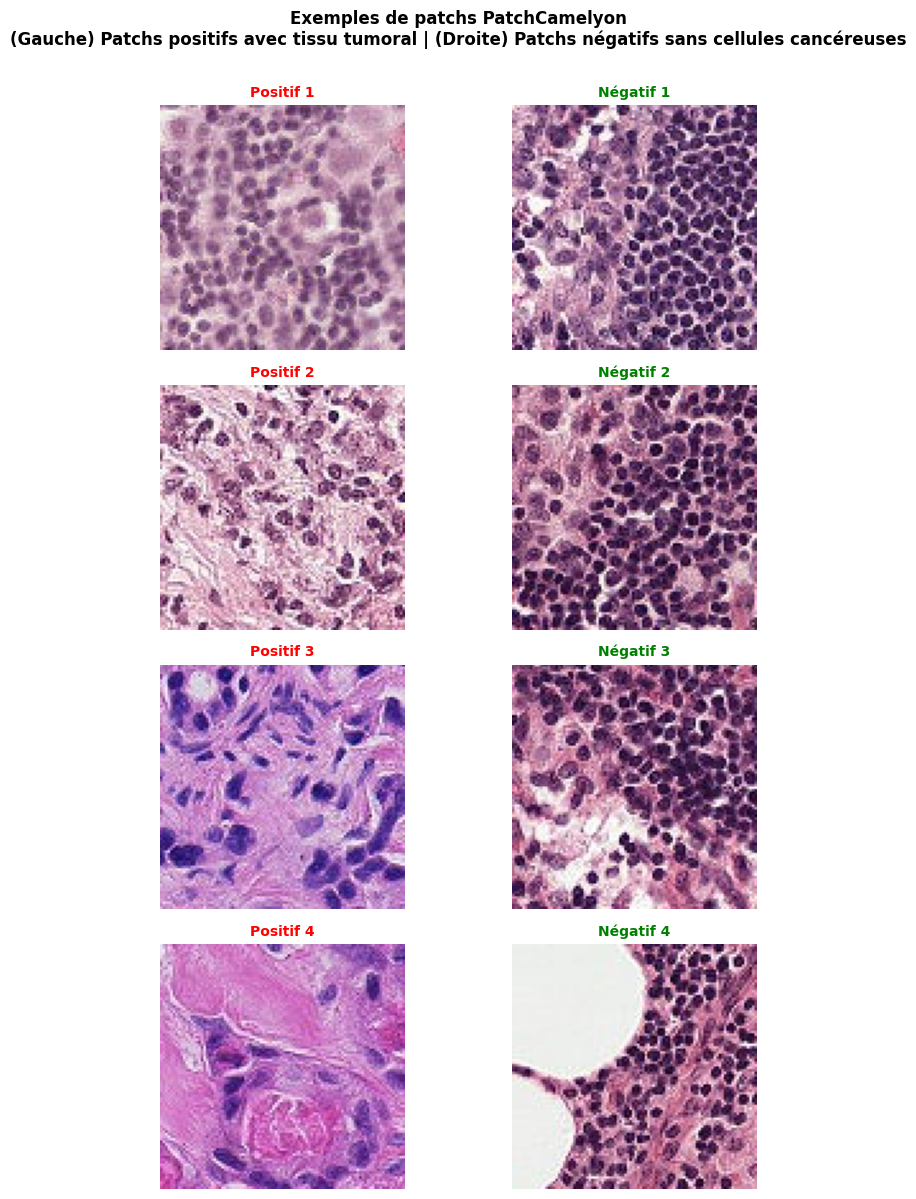


Figure sauvegardée → reports\figures\pcam_patch_examples.png

Patchs positifs affichés:
  1. 387cc19be18c77f421e85acfec92aad6dfe878a9
  2. 06b6974774fe6d299d9ab00cdb3ef8de0400ea58
  3. 05df0c1fa2b1682fd6bf5ce36be8c950385cf441
  4. 2f887d778f667763215e65930d57e210beaeb15f

Patchs négatifs affichés:
  1. 53b74af1c16859053d8ccb06f453155d98c637c5
  2. 7d92b72d9d357f29fc959fe96c32f65f9c142d34
  3. bdf8ab67ae697ee542b4098fe61fbe2dc849b0b2
  4. 238841890ecc63952562312e0681af3c3a147155


In [7]:
# Cellule robuste : affiche 4 patchs positifs et 4 négatifs PCam et sauvegarde la figure
import os, csv, random, sys
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

print("Répertoire courant:", os.getcwd())

# --------- Localisation robuste des chemins ---------
# Candidats pour data/ (adapter/ajouter si besoin)
CANDIDATE_DATA_DIRS = [
    Path("data"),
    Path("./data"),
    Path("../data"),
    Path("../../data"),
    Path.cwd() / "data",
    Path.cwd().parent / "data",
]

# Si tu connais le chemin exact, tu peux aussi le forcer ici :
# CANDIDATE_DATA_DIRS.insert(0, Path("C:/Users/USER/Desktop/memoire/cancer-detection-mlops/data"))

LABELS_CSV = None
TRAIN_DIR = None

for base in CANDIDATE_DATA_DIRS:
    if (base / "train_labels.csv").exists() and (base / "train").exists():
        LABELS_CSV = base / "train_labels.csv"
        TRAIN_DIR = base / "train"
        break

# Si toujours pas trouvé, tentative globale (coûteux mais pratique)
if LABELS_CSV is None:
    for p in Path.cwd().rglob("train_labels.csv"):
        # on suppose que le dossier "train" est frère du csv
        if (p.parent / "train").exists():
            LABELS_CSV = p
            TRAIN_DIR  = p.parent / "train"
            break

if LABELS_CSV is None or TRAIN_DIR is None:
    raise FileNotFoundError(
        "Impossible de localiser data/train_labels.csv et/ou data/train.\n"
        "→ Vérifie que tu exécutes le notebook à la racine du projet, ou ajuste les chemins.\n"
        "Arborescence attendue : <repo>/data/train_labels.csv et <repo>/data/train/"
    )

print(f"Chemin détecté pour train_labels.csv : {LABELS_CSV}")
print(f"Dossier images train : {TRAIN_DIR}")

# --------- Chargement des IDs positifs/négatifs ---------
pos_ids, neg_ids = [], []
with open(LABELS_CSV, newline="", encoding="utf-8") as f:
    r = csv.DictReader(f)
    # colonnes attendues: id,label  (0/1)
    for row in r:
        _id = row.get("id") or row.get("image_id") or row.get("filename")  # tolérance
        if _id is None:
            raise KeyError("Le CSV doit contenir une colonne 'id' (ou 'image_id' / 'filename').")
        lbl = int(row["label"])
        (pos_ids if lbl == 1 else neg_ids).append(_id)

if not pos_ids or not neg_ids:
    raise RuntimeError("Le CSV ne contient pas de positifs ET de négatifs. Vérifie train_labels.csv.")

# --------- Fonction pour retrouver le fichier image à partir d'un id ---------
EXTS = (".png",".jpg",".jpeg",".tif",".tiff")

def find_image(img_id, root: Path):
    # 1) Essayer id + extensions
    for ext in EXTS:
        p = root / f"{img_id}{ext}"
        if p.exists():
            return p
    # 2) Balayer tous les fichiers si les ids n'ont pas d'extension simple
    for p in root.rglob("*"):
        if p.is_file() and p.suffix.lower() in EXTS and (img_id == p.stem or img_id in p.stem):
            return p
    raise FileNotFoundError(f"Image introuvable pour id='{img_id}' dans {root}")

# --------- Choisir 4 exemples positifs et 4 négatifs ---------
random.seed(42)  # pour figer l'exemple si tu relances
selected_pos_ids = random.sample(pos_ids, 4)
selected_neg_ids = random.sample(neg_ids, 4)

# Charger les images
pos_images = [Image.open(find_image(pid, TRAIN_DIR)).convert("RGB") for pid in selected_pos_ids]
neg_images = [Image.open(find_image(nid, TRAIN_DIR)).convert("RGB") for nid in selected_neg_ids]

# --------- Affichage en grille 4x2 ---------
fig, axes = plt.subplots(4, 2, figsize=(8, 12))

# Colonne de gauche : positifs
for i in range(4):
    axes[i, 0].imshow(pos_images[i])
    axes[i, 0].set_title(f"Positif {i+1}", fontsize=10, fontweight='bold', color='red')
    axes[i, 0].axis("off")

# Colonne de droite : négatifs
for i in range(4):
    axes[i, 1].imshow(neg_images[i])
    axes[i, 1].set_title(f"Négatif {i+1}", fontsize=10, fontweight='bold', color='green')
    axes[i, 1].axis("off")

# Titre général
plt.suptitle(
    "Exemples de patchs PatchCamelyon\n"
    "(Gauche) Patchs positifs avec tissu tumoral | (Droite) Patchs négatifs sans cellules cancéreuses",
    fontsize=12, fontweight='bold', y=0.995
)

plt.tight_layout(rect=[0, 0, 1, 0.99])

# --------- Sauvegarde figure ---------
OUT_DIR = Path("reports/figures")
OUT_DIR.mkdir(parents=True, exist_ok=True)
OUT_PNG = OUT_DIR / "pcam_patch_examples.png"
plt.savefig(OUT_PNG, dpi=200, bbox_inches='tight')
plt.show()

print(f"\nFigure sauvegardée → {OUT_PNG}")
print(f"\nPatchs positifs affichés:")
for i, pid in enumerate(selected_pos_ids, 1):
    print(f"  {i}. {pid}")
print(f"\nPatchs négatifs affichés:")
for i, nid in enumerate(selected_neg_ids, 1):
    print(f"  {i}. {nid}")